# Figure 2A

In [1]:
# required libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
def plot_create():
    
    # Experimental switchpoint data
    exp_time = [4, 6, 8]
    exp_sp = [-800, -640, -280]
    exp_err = [-130, -140, -187]

    # Experimental switchpoint plot
    ax.errorbar(exp_time , exp_sp, yerr=exp_err, color='black',ecolor='black', fmt='o',markersize=11,elinewidth=3, label='Experimental switchpoint')
    
    ax.legend(loc='upper left', facecolor='white')
    plt.xlabel('Time (days)')
    plt.ylabel('AP Position' + ' (' + r'$\mu$'+'m)')
    plt.ylim(-2000,1000)
    plt.xlim(0,8.2)  
    fig.set_size_inches(18.5, 12.5)
    plt.rcParams.update({'font.size': 24})
    filename = "./" + "Fig_2A.png"
    fig.savefig(filename, dpi=300, bbox_inches='tight')

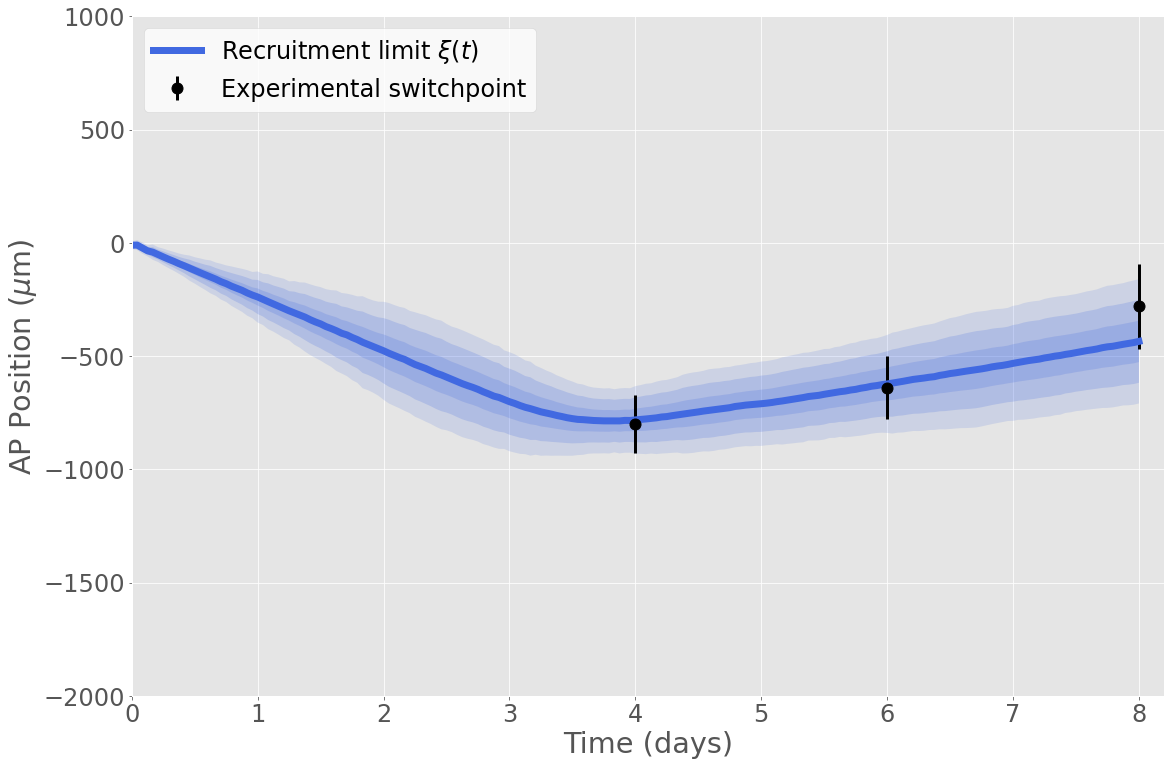

In [4]:
n0_mean,n0_std = 196,2 # n0 mean and standar deviation
l_mean,l_std = 828,30      # lambda mean and standar deviation
tau_mean,tau_std = 85,12   # tau mean and standar deviation

root = "../main/simulations/"
model = 'switchpoint/'
parameters = 'n0='+str(n0_mean)+'\n'+'l='+str(l_mean)+'\n'+'tau='+str(tau_mean)+'/'
path = root+model+parameters

# 100 simulations seeds from main/Simulating_recruitment_limit.ipynb
all_seeds = []
files = os.listdir(path)
for seed in files:    
    opened_file = open(path+seed)
    data = pd.read_csv(opened_file, delimiter=',')
    outgrowth = data['0']
    all_seeds.append(outgrowth)
all_seeds = pd.concat(all_seeds, ignore_index=True, axis=1)
all_seeds = all_seeds.dropna()
df_mean = np.asarray(all_seeds.mean(axis=1))
df_std = np.asarray(all_seeds.std(axis=1))
time = outgrowth.index/24


# Model simulations
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(time, df_mean, color='royalblue', linewidth=7, label='Recruitment limit '+r'$\xi(t)$')
ax.fill_between(time, df_mean-df_std, df_mean+df_std, facecolor='royalblue', alpha=0.2)
ax.fill_between(time, df_mean-2*df_std, df_mean+2*df_std, where=(df_mean-2*df_std)<(df_mean-df_std), facecolor='royalblue', alpha=0.2)
ax.fill_between(time, df_mean-3*df_std, df_mean+3*df_std, where=(df_mean-3*df_std)<(df_mean-df_mean), facecolor='royalblue', alpha=0.15)

plot_create()